<a href="https://colab.research.google.com/github/bipinr8/MH_cash_deployment/blob/main/Morgan_Housel_Cash_deployment_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Morgan Housel's cash deployment strategy**.

How to deploy surplus cash, according to Morgan Housel
When the market crashes 10%, deploy
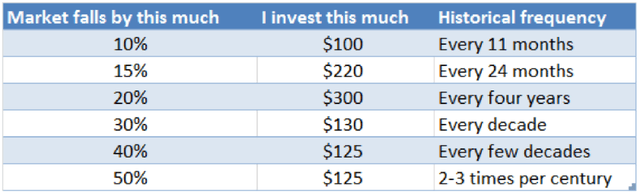

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing libraries
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [3]:
# reading excel file into data frame
df_source = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MH/Source_data.xlsx',
                       sheet_name='Sheet1')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:

# checking data frame
df_source.head()

,Date,Liquid Fund,Nifty 100
0,2003-01-01,1186.99,1000.00
1,2003-01-02,1187.16,1008.03
2,2003-01-03,1187.35,1004.49
3,2003-01-06,1187.92,999.85
4,2003-01-07,1188.09,997.81


In [5]:
# view df details
df_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5068 entries, 0 to 5067
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         5068 non-null   datetime64[ns]
 1   Liquid Fund  5068 non-null   float64       
 2   Nifty 100    5068 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 118.9 KB


In [6]:
# import required libraries for graph plot
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
print ('Matplotlib version: ', mpl.__version__ )

# choosing plot style
print(plt.style.available)
mpl.style.use(['ggplot'])

Matplotlib version:  3.7.1
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


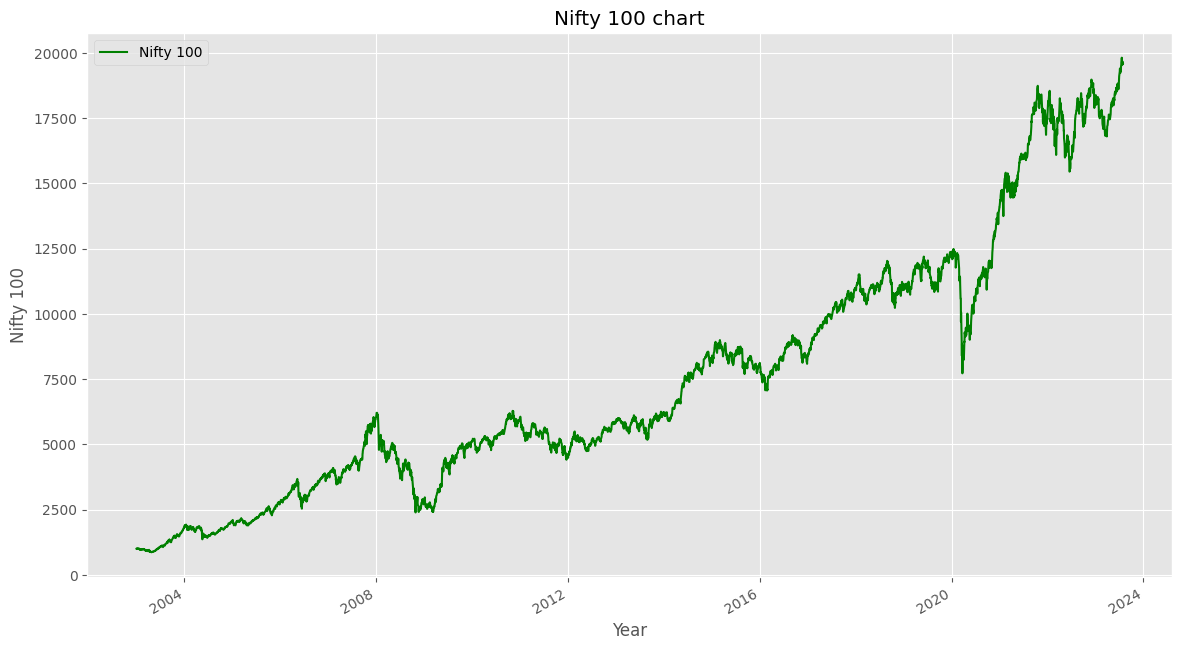

In [7]:

# creating new dataframe graphdf with 2 columns Date and Nifty
graphdf=df_source[['Date','Nifty 100']]

# plotting the line chart with 'Date' as X axis
graphdf.set_index('Date').plot(kind='line',figsize=(14,8),color='green')
plt.title('Nifty 100 chart')
plt.xlabel('Year')
plt.ylabel('Nifty 100')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MH/pic01.png')
plt.show()

In [8]:
# declarations
daily_sip = 100

In [9]:
# creating a new data frame
df2=df_source.copy()

# counting number of rows
var_rows=len(df2.index)

# creating a new data frame to store peaks and flags for whether drawdown from this peak has happened
df_peak=pd.DataFrame(columns=['Date','Peak','D10','D15','D20','D30','D40','D50'])

# declaring a new variable to mark start of peak data frame
j=0

# adding columns and setting first row values
df2.loc[0,'Peak']=df2.loc[0,'Nifty 100'] # this col will have peak values of index till that date; first row peak = starting value
df2.loc[0,'Drawdown']=0.0 # this col will show drawdown from peak; first row peak = starting value
df2.loc[0,'Sip inv']=daily_sip # daily sip investment; first day's investment
df2.loc[0,'Sip net inv']=df2.loc[0,'Sip inv'] # col to store total sum of money invested
df2.loc[0,'Sip units']=df2.loc[0,'Sip inv']/df2.loc[0,'Nifty 100'] # units purchased on the first day
df2.loc[0,'Sip accumulated units']=df2.loc[0,'Sip units'] # col for accumulated units via sip; first day's value = first day's units purchased
df2.loc[0,'Sip market value']=df2.loc[0,'Sip accumulated units']*df2.loc[0,'Nifty 100'] # market value of sip

# setting first row values for peak data frame
df_peak.loc[0,'Date']=df2.loc[0,'Date']
df_peak.loc[0,'Peak']=df2.loc[0,'Peak']
df_peak.loc[0,'D10']=0 # 0 flags a 10% drawdown hasn't happened from this peak
df_peak.loc[0,'D15']=0
df_peak.loc[0,'D20']=0
df_peak.loc[0,'D30']=0
df_peak.loc[0,'D40']=0
df_peak.loc[0,'D50']=0

for i in range(1,var_rows):
  df2.loc[i,'Peak']=df2.loc[:i,'Nifty 100'].max() # for all days from the beginning till current date, max is stored in col. Peak
  df2.loc[i,'Drawdown']=(df2.loc[i,'Nifty 100']-df2.loc[i,'Peak'])*100/df2.loc[i,'Peak'] # drawdown is what percent current index value is down from the peak observed till that date
  df2.loc[i,'Sip inv']=daily_sip
  df2.loc[i,'Sip net inv']=df2.loc[i-1,'Sip net inv']+df2.loc[i,'Sip inv']
  df2.loc[i,'Sip units']=df2.loc[i,'Sip inv']/df2.loc[i,'Nifty 100']
  df2.loc[i,'Sip accumulated units']=df2.loc[i-1,'Sip accumulated units']+df2.loc[i,'Sip units']
  df2.loc[i,'Sip market value']=df2.loc[i,'Sip accumulated units']*df2.loc[i,'Nifty 100']
  if (df2.loc[i,'Peak']>df2.loc[i-1,'Peak']): # a new peak is observed
    j=j+1
    df_peak.loc[j,'Peak']=df2.loc[i,'Peak'] # the new peak now stored in peak data frame
    df_peak.loc[j,'Date']=df2.loc[i,'Date']
    df_peak.loc[j,'D10']=0 # setting no drawdowns happened from this new peak
    df_peak.loc[j,'D15']=0
    df_peak.loc[j,'D20']=0
    df_peak.loc[j,'D30']=0
    df_peak.loc[j,'D40']=0
    df_peak.loc[j,'D50']=0
    """
  if (df2.loc[i,'Drawdown']<=-50):
    if (df_peak.loc[j,'D50']==1):
      # drawdown alrady addressed, cash deployed
    else:
      # code to deploy 100% of cash
      df_peak.loc[j,'D50']=1 # marking that 50% drawdown from new peak is addressed
      df_peak.loc[j,'D40']=1 # also marking all lesser drawdowns as addressed
      df_peak.loc[j,'D30']=1
      df_peak.loc[j,'D20']=1
      df_peak.loc[j,'D15']=1
      df_peak.loc[j,'D10']=1
  elif (df2.loc[i,'Drawdown']<=-40):
    if (df_peak.loc[j,'D40']==1):
      # drawdown alrady addressed, cash deployed
    else:
      # code to deploy 100% of cash
      df_peak.loc[j,'D40']=1 # marking that 50% drawdown from new peak is addressed
      df_peak.loc[j,'D30']=1 # also marking all lesser drawdowns as addressed
      df_peak.loc[j,'D20']=1
      df_peak.loc[j,'D15']=1
      df_peak.loc[j,'D10']=1
      """

In [ ]:
df2.head()

,Date,Liquid Fund,Nifty 100,Peak,Drawdown,Sip inv,Sip net inv,Sip units,Sip accumulated units,Sip market value
0,2003-01-01,1186.99,1000.00,1000.00,0.000000,100.0,100.0,0.100000,0.100000,100.000000
1,2003-01-02,1187.16,1008.03,1008.03,0.000000,100.0,200.0,0.099203,0.199203,200.803000
2,2003-01-03,1187.35,1004.49,1008.03,-0.351180,100.0,300.0,0.099553,0.298756,300.097820
3,2003-01-06,1187.92,999.85,1008.03,-0.811484,100.0,400.0,0.100015,0.398771,398.711590
4,2003-01-07,1188.09,997.81,1008.03,-1.013859,100.0,500.0,0.100219,0.498991,497.898097


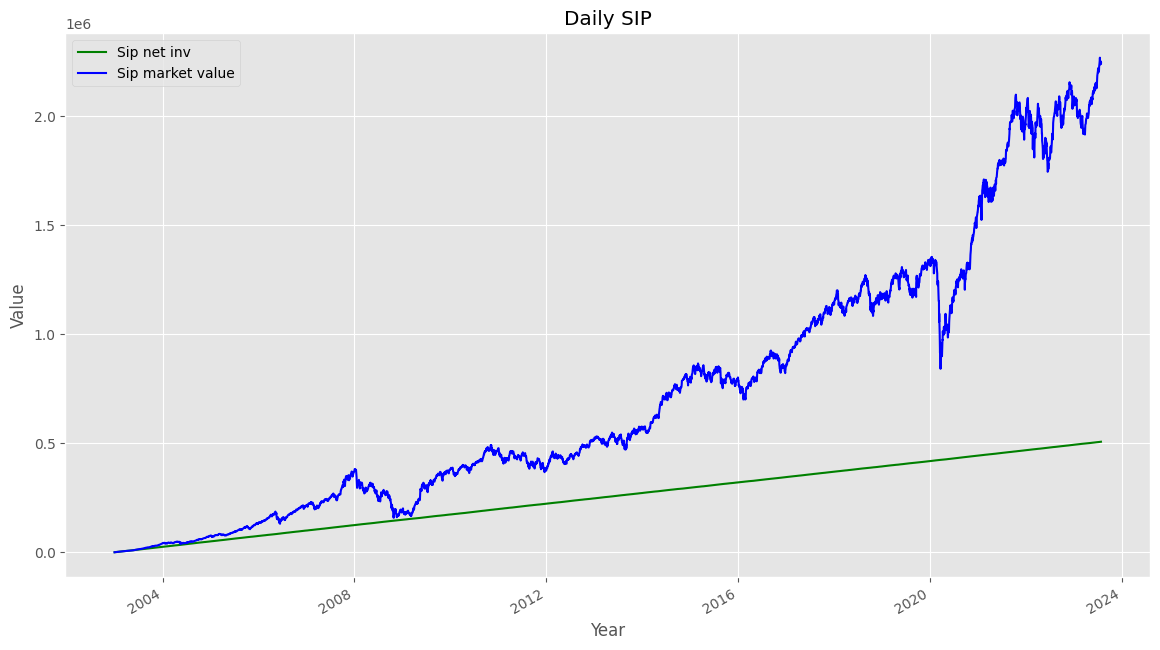

In [ ]:
# creating new dataframe graphdf with 2 columns Date and Nifty
graphdf=df2[['Date','Sip net inv','Sip market value']]

# plotting the line chart with 'Date' as X axis
graphdf.set_index('Date').plot(kind='line',figsize=(14,8),color=('green','blue'))
plt.title('Daily SIP')
plt.xlabel('Year')
plt.ylabel('Value')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MH/pic02.png')
plt.show()

In [ ]:
df_peak.head()
# writing to excel
df_peak.to_excel('/content/drive/MyDrive/Colab Notebooks/MH/peaks.xlsx', sheet_name='peaks', index=False)